<a href="https://colab.research.google.com/github/Dahlia-Brown/Math-152/blob/main/Exploration_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Collatz Conjecture

## Introduction - A Brief History
The Collatz conjecture, an idea brought up in 1937 by German mathematician Lothar Collatz, is said to be a problem that current day mathematics is not yet ready to solve. Mathematicians throughout history have lamented over spending months of research on it only to arrive at nothing. It was even joked to be a conspiracy meant to slow down mathematical research in the U.S. In the simplest terms, the conjecture looks at a sequence of integers where the next integer is determined from the previous term following two rules

1.   If the integer is even, divide by 2
2.   If the integer is odd, multiply by 3 and add 1

It is conjectured that for any positive integer first inputed, the sequence will eventually arrive to the value 1 and from there be stuck in a constant loop (going: 1, 4, 2, 1, 4, ...). The only ways to deviate from this loop would be to either find another loop that forever repeats or find an integer that increases forever. To this day, no sequence of those types has been found.

Click [here](https://d2r55xnwy6nx47.cloudfront.net/uploads/2019/12/CollatzGraph_1300Lede.mp4) to see a visual on how this beautiful menace of a conjecture behaves.

In this project we will explore these rules as well as additional properties of the Collatz Conjecture. We will see what happens when allowing for negative number, how "changing the rules" can affect the outputs, and look at the behavior of dropping time. 


## Conjecture (Collatz)
In more formal terms, the Collatz conjecture states that for any $x_0 \in \mathbb{N}$, there exists a $n>0$ such that $f^n(x_0)=1$.

In [ ]:
from matplotlib import pyplot as plt 

In [ ]:
# Check the conjecture for all positive integers up to a big number (a thousand? a million?)
# collatz
def collatz(n): #defining colatz function
  while abs(n) > 1: #creating a while loop that runs the conjecture, and stops when it reaches n = 1
    print(n,end=',') #got from https://www.pythonpool.com/collatz-sequence-python/
    if n%2==0: #if n is even, divide by 2
      n = n//2
    else:  #if n is odd, replace with 3n+1
      n = 3*n+1
  return n

collatz(15)

15,46,23,70,35,106,53,160,80,40,20,10,5,16,8,4,2,

1

In [ ]:
collatz(-10)
#collatz(-10) -20,-10,-5,-14,-7,-10,-5,-14,-7

In [ ]:
def conjecture(n): ## creating a function called conjecture with variable n
  prev = [] ## creating an empty list to store every step of the sequence
  prev.append(n) ## putting original value in list 
  while abs(n) > 1: ## creating a while loop that runs the conjecture, and stops when it reaches n = 1.
    if n % 2 == 0: ## checking if n is even
      n = n // 2 ## if n is even, divide n by 2 and rounds up the decimals
    else: ## if n is not even, then it must be odd
      n = 3*n + 1 ## if n is odd, multiply n by 3 and plus 1
    prev.append(n) ## Adding next step to the list
  return prev ## Once while loops is done, return sequence as a list

In [ ]:
print(conjecture(10))

[10, 5, 16, 8, 4, 2, 1]


In [ ]:
#Numbers up to 1,000,000
conjectures = dict() 
conjecturesChange1 = dict()
for i in range(1,1000000):
  conjectures[i] = conjecture(i)

## Dropping Time

In [ ]:
def droppingTime(n): ## creating a function called droppingTime with list n, which n is the conjecture sequence
  if n[0] <= 1: ## Accounting for the case of 0 and 1 input, because sigma(1) and sigma(0) is undefined
    return None ## Returning None as our undefined data type
  for i in range(1, len(n)): ## a for loop which starts at index 1 and ends at index n
    if n[i] < n[0]: ## if index i is smaller than index 0, then we find dropping point
      return i ## Return the index of the conjecture sequence

In [ ]:
dropTimes = [] ## creating a list to store drop times
dropTimes.append(None) ## Adding 'None' to the list to account for signma(0), which is undefined
dropTimes.append(None) ## Adding 'None' to the list to account for signma(1), which is undefined
nMod8 = [] ## creating an empty list that stores n moduel 8
nMod8.append(None) ## Adding 2 None's because we want to compare the same index to dropTimes list
nMod8.append(None)
nMod16 = [] ## creating an empty list that stores n moduel 16
nMod16.append(None) ## Adding 2 None's because we want to compare the same index to dropTimes list
nMod16.append(None)
for i in range(2,1000): ## creating a for loop which ranges from 1 to 1000 
  dropTimes.append(droppingTime(conjectures[i])) ##Adding the returned drop times index to the empty list we created above
  nMod8.append(i % 8) 
  nMod16.append(i % 16)

In [ ]:
print(dropTimes[17]) ## Checking dropTimes [17] value

3


In [ ]:
print(dropTimes) ##printing drop times index
print(nMod8)
print(nMod16)
## We see there is repeating drop times patterns where it follows: 1,3,1,a, 1,3,1,b, 1,3,1,c, 1,3,... while a, b, c...are a random number

[None, None, 1, 6, 1, 3, 1, 11, 1, 3, 1, 8, 1, 3, 1, 11, 1, 3, 1, 6, 1, 3, 1, 8, 1, 3, 1, 96, 1, 3, 1, 91, 1, 3, 1, 6, 1, 3, 1, 13, 1, 3, 1, 8, 1, 3, 1, 88, 1, 3, 1, 6, 1, 3, 1, 8, 1, 3, 1, 11, 1, 3, 1, 88, 1, 3, 1, 6, 1, 3, 1, 83, 1, 3, 1, 8, 1, 3, 1, 13, 1, 3, 1, 6, 1, 3, 1, 8, 1, 3, 1, 73, 1, 3, 1, 13, 1, 3, 1, 6, 1, 3, 1, 68, 1, 3, 1, 8, 1, 3, 1, 50, 1, 3, 1, 6, 1, 3, 1, 8, 1, 3, 1, 13, 1, 3, 1, 24, 1, 3, 1, 6, 1, 3, 1, 11, 1, 3, 1, 8, 1, 3, 1, 11, 1, 3, 1, 6, 1, 3, 1, 8, 1, 3, 1, 65, 1, 3, 1, 34, 1, 3, 1, 6, 1, 3, 1, 47, 1, 3, 1, 8, 1, 3, 1, 13, 1, 3, 1, 6, 1, 3, 1, 8, 1, 3, 1, 11, 1, 3, 1, 21, 1, 3, 1, 6, 1, 3, 1, 13, 1, 3, 1, 8, 1, 3, 1, 21, 1, 3, 1, 6, 1, 3, 1, 8, 1, 3, 1, 13, 1, 3, 1, 50, 1, 3, 1, 6, 1, 3, 1, 19, 1, 3, 1, 8, 1, 3, 1, 32, 1, 3, 1, 6, 1, 3, 1, 8, 1, 3, 1, 44, 1, 3, 1, 21, 1, 3, 1, 6, 1, 3, 1, 11, 1, 3, 1, 8, 1, 3, 1, 11, 1, 3, 1, 6, 1, 3, 1, 8, 1, 3, 1, 39, 1, 3, 1, 16, 1, 3, 1, 6, 1, 3, 1, 13, 1, 3, 1, 8, 1, 3, 1, 21, 1, 3, 1, 6, 1, 3, 1, 8, 1, 3, 1, 11, 1, 3, 

## Plotting for sigma(n).

In [ ]:
def plot(n):
  y = n
  x = [i for i in range(0,len(n))]
  plt.plot(x,y)
  plt.xlabel('Index')
  plt.ylabel('Sequence Value')
  plt.grid(True)
  plt.show()

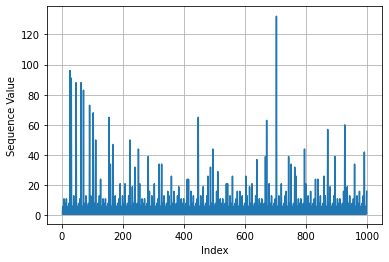

In [ ]:
plot(dropTimes)

## Change of Rules
In these next five blocks of code, we explore a rule change for even and odd numbers. Instead of Collatz's multiply by 3 and add 1 to odd numbers, we first change it to multiply by 3 and add 3. Second, we change odd numbers to just subtract 1. Third, we change the rule to multiply even numbers by 2 and divide by 3. Fourth, multiply even numbers by -1 and divide by 2. Lastly, we change the rule to multiply odd numbers by 4 and subtract 2 followed by multiply odd numbers by 2 and add 5.

In [ ]:
# "change of rule" from 3n+1 to 3n+3
def conjecture3(n):
  print(n)
  while n != 1:
    if n % 2 == 0:
      n = n // 2
    else:
      n = 3*n + 3 #changed 3n+1 to 3n+3
  print(n)

In [ ]:
#Same function as "conjecure" except with rule change of n - 1 for odd values
def ruleChangeCon(n):
  prev = [] ## creating an empty list to store every step of the sequence
  prev.append(n) ## putting original value in list 
  while n > 1: ## creating a while loop that runs the conjecture, and stops when it reaches n = 1.
    if n % 2 == 0: ## checking if n is even
      n = n // 2 ## if n is even, divide n by 2 and rounds up the decimals
    else: ## if n is not even, then it must be odd
      n = 3*n - 1 ## if n is odd, multiply n by 3 and minus 1
    prev.append(n) ## Adding next step to the list
    print(n)
  return prev ## Once while loops is done, return sequence as a list

#ruleChangeCon(10) goes 20,10,5,14,7 repeating

In [ ]:
#Same function as "collatz" except with rule change of 2*n//3 for even numbers 
def ruleChangeCollatz(n):
  prev = [] ## creating an empty list to store every step of the sequence
  prev.append(n) ## putting original value in list 
  while abs(n) > 1: #creating a while loop that runs the conjecture, and stops when it reaches n = 1
    print(n,end=',') #got from https://www.pythonpool.com/collatz-sequence-python/
    if n%2==0: #if n is even, divide by 2*n//3
      n = 2*n//(3)
    else:  #if n is odd, replace with 3n+1
      n = 3*n+1
  return n## if n is odd, multiply n by 3 and minus 1
  prev.append(n) ## Adding next step to the list
  print(n)
  return prev

ruleChangeCollatz(15) #this series ends with 4,2,1 also! 2*n//3 gives same series as n//2 

15,46,30,20,13,40,26,17,52,34,22,14,9,28,18,12,8,5,16,10,6,4,2,

1

In [ ]:
#Same function as "collatz" except with rule change of -n//2 for even numbers 
def ruleChangeCollatz2(n):
  prev = [] ## creating an empty list to store every step of the sequence
  prev.append(n) ## putting original value in list 
  while abs(n) > 1: #creating a while loop that runs the conjecture, and stops when it reaches n = 1
    print(n,end=',') #got from https://www.pythonpool.com/collatz-sequence-python/
    if n%2==0: #if n is even, divide by -n//2
      n = -n//2
    else:  #if n is odd, replace with 3n+1
      n = 3*n+1
  return n## if n is odd, multiply n by 3 and minus 1
  prev.append(n) ## Adding next step to the list
  print(n)
  return prev

ruleChangeCollatz2(15) #series goes into the negative, but still ends. with 4,2,1 but just negative

15,46,-23,-68,34,-17,-50,25,76,-38,19,58,-29,-86,43,130,-65,-194,97,292,-146,73,220,-110,55,166,-83,-248,124,-62,31,94,-47,-140,70,-35,-104,52,-26,13,40,-20,10,-5,-14,7,22,-11,-32,16,-8,4,-2,

1

In [ ]:
#Same function as "collatz" except with rule change of 4*n-2 and 2*n+5 for odd numbers 
def ruleChangeCollatz3(n):
  prev = [] ## creating an empty list to store every step of the sequence
  prev.append(n) ## putting original value in list 
  while abs(n) > 1: #creating a while loop that runs the conjecture, and stops when it reaches n = 1
    print(n,end=',') #got from https://www.pythonpool.com/collatz-sequence-python/
    if n%2==0: #if n is even, divide n by 2
      n = n//2
    else:  #if n is odd, replace with 4n-2, 2n+5
      n = 2*n+5
  return n## if n is odd, multiply n by 3 and minus 1
  prev.append(n) ## Adding next step to the list
  print(n)
  return prev

#ruleChangeCollatz3(5) the series goes on forever when you replace 3n+1 to 2n+5 (too long to see pattern)
#ruleChangeCollatz3(5) the series goes on forever when you replace 3n+1 to 4n-2 (too long to see pattern)

In [ ]:
prev_vals=[]
a=['starting value']
def conjecture(n):
  print(n)
  while (n > 1) and (n not in prev_vals): #creating list of previous values to stop the infinite loop or prev_vals.count(n)
    prev_vals.append(n)
    return n
    if n % 2 == 0:
      n = n // 2
    else:
      n = 3*n - 1
    print(n)

conjecture(20)

20


20

In [ ]:
#negative even numbers vs positive event number

##Our Findings
After experimenting with the Collatz Conjecture by changing the rules, looking at how it acts with negative integers and analyzing the drop times, we found many interesting things. When we were changing the rules of the conjecture we observed that when changing the rules for when n is even, the series still ended up with a 4,2,1 loop. However when we changed the rules when n was odd, the series took on a whole new identity. When inputing negative numbers into the conjecture it created a loop of -20,-10,-5,-14,-7,-10,-5,-14,-7. Lastly, for the drop time we observed that there are repeating drop times patterns where it follows: 1,3,1,a, 1,3,1,b, 1,3,1,c, 1,3,... while a, b, c...are a random number.


## Current Research on the Collatz Conjecture
Although the Collatz Conjecture is nowhere near proved, UCLA mathematician Terence Tao received the Fields Medal in 2006 for making the most progress on this proof. The Fields Medal is the highest honor, and he is regarded as one of the top mathematicians of his generation. Funnily enough, what gave him this genius idea was an anonymous comment on his blog that stated as long as he could prove it worked for *almost* all numbers, not all, it would be sufficient. That idea lead Tao to realize he could apply techniques used to study partial differential equations to the Collatz Conjecture. The technique: using large samples of numbers and applying the conjecture. If almost 100% of the sample behaved the same way (going to 1), then it would be enough to conclude that it worked for the whole sample. However, each sample had to be weighted the same - and by weights, that means that the numbers in the sample share a property. Tao's first sample excluded multiples of 3 because the conjecture quickly went through multiples of 3. He then moved on to include samples 3 modulo 1 and then 3 modulo 2. The goal of using weighted samples was to ensure that most of the numbers maintained the same character as they were cycled through the conjecture. With this technique he was able to prove that 99% of all starting values greater than 4 quardrillion end up in a number smaller than 200. Although this conclusion is still a speck in the exploration of the Collatz Conjecture, is the closest conclusion reached in history.

## Bibliography

1.  O'Connor, J.J.; Robertson, E.F. (2006). "Lothar Collatz". St Andrews University School of Mathematics and Statistics, Scotland.
2. "Understanding Collatz Sequence in Python." *Python Pool,* https://www.pythonpool.com/collatz-sequence-python/. Accessed 4 Feb. 2022.
3. “Mathematician Proves Huge Result on 'Dangerous' Problem.” Engineering Inspiration, https://ucl.engins.org/external/mathematician-proves-huge-result-on-dangerous-problem/. 